# Module 6, Activity 3: Drawing Spatial Points

In this Module, we're going to look at plotting points on a map. Points can represent locations of interest, such as cities or towns. Like last activity, we'll be using [**geopandas**](https://geopandas.org/en/stable/) to access datasets with points where necessary, and [**cartopy**](https://scitools.org.uk/cartopy/docs/latest/) to plot them. Let's get started by loading our packages and plotting a map of Australia. Instead of using Natural Earth for our map of Australia, we'll use a shapefile of Australia, downloaded from the [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files#data-download). The ABS shapefile has a much finer resolution, which we'll need for this activity.

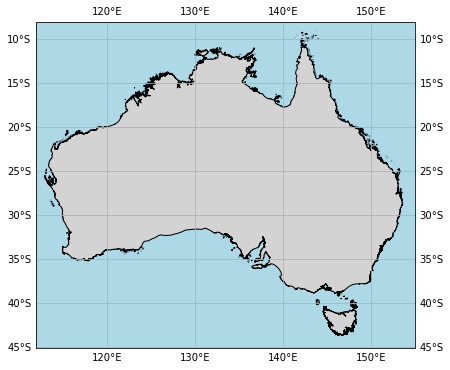

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

aus_map = gpd.read_file("data/Australia_Boundaries/")

crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_geometries(aus_map.geometry, crs = crss, facecolor = "#d3d3d3", edgecolor = "black") 
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.LAND, facecolor = "#add8e6") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

ax.set_extent([112, # Longitude lower bound (degrees east)
               155, # Longitude upper bound (degrees east)
               -43, # Latitude lower bound (degrees north)
               -8]) # Latitude upper bound (degrees north)

plt.show() # This could take a moment - the ABS Australia shapefile is large.

**Exercise:** Notice above that we added a land feature, but made it the same colour as the ocean. This is so we can only see Australia. In our map's extent, this hides the bottom of Indonesia and Papua New Guinea. Try changing the map's extent to see what the whole world looks like when we make land have the same colour as the ocean. It's a lonely, watery world!

Adding spatial points to a map is very easy with Matplotlib. In essence, we are just adding a scatterplot axes that has the same CRS as the map it's being added to. Let's import our dataset of Australia's cities and towns, using **Pandas**.

In [9]:
# Import csv
au_cities = pd.read_csv("data/au.csv")
au_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714
...,...,...,...,...,...,...,...,...,...
538,Bunyip,-38.0833,145.7170,Australia,AU,Victoria,NaN,2468,2468
539,Dodges Ferry,-42.8539,147.6194,Australia,AU,Tasmania,NaN,2467,2467
540,Lancefield,-37.2667,144.7167,Australia,AU,Victoria,NaN,2455,2455
541,Palm Island,-18.7345,146.5794,Australia,AU,Queensland,NaN,2455,2455


Each row is a city, with its population and some other information. Cities are ordered by population size, from largest to smallest. Most importantly, each row has the longitude (long) and latitude (lat) of the city - these are each location's x and y-coordinates in our map. Let's add all the points, but set each point's size to be proportional to the population at that location.

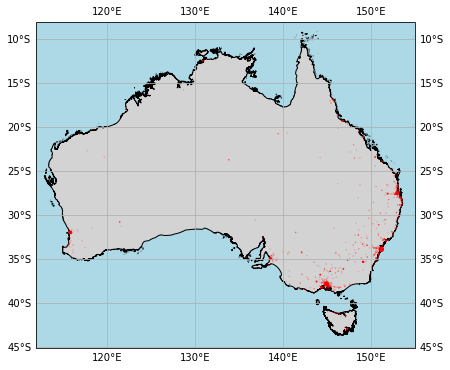

In [14]:
crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_geometries(aus_map.geometry, crs = crss, facecolor = "#d3d3d3", edgecolor = "black") 
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.LAND, facecolor = "#add8e6") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Include a 'scatterplot' of Australia's 543 largest cities and towns, where each point's size depends on population
max_pointsize = 20

ax.scatter(
    x=au_cities.lng, # Longitude
    y=au_cities.lat, # Latitude
    color="red", # Point colour
    s=max_pointsize*au_cities.population/au_cities.population.max(), # Point size
    alpha=1, # Opacity
    transform=crss) # CRS of points

ax.set_extent([112, # Longitude lower bound (degrees east)
               155, # Longitude upper bound (degrees east)
               -43, # Latitude lower bound (degrees north)
               -8]) # Latitude upper bound (degrees north)

plt.show()

**Exercise:** Experiment with the **max_pointsize** argument to modify the size of all the points. Also, try plotting all points with just a single point size.

Let's try plotting only Australian cities with populations greater than 100,000 people.

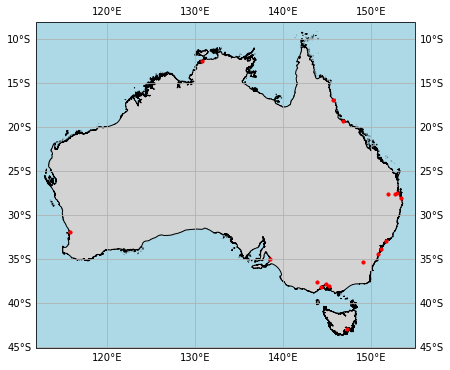

In [4]:
big_cities = au_cities[au_cities["population"] > 100000]

crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_geometries(aus_map.geometry, crs = crss, facecolor = "#d3d3d3", edgecolor = "black") 
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.LAND, facecolor = "#add8e6") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Include a 'scatterplot' of Australia's 543 largest cities and towns
ax.scatter(
    x=big_cities.lng,
    y=big_cities.lat,
    color="red",
    s=10,
    alpha=1,
    transform=crss)

ax.set_extent([112, # Longitude lower bound (degrees east)
               155, # Longitude upper bound (degrees east)
               -43, # Latitude lower bound (degrees north)
               -8]) # Latitude upper bound (degrees north)

plt.show()

Much more sparse!

**Exercise:** Add cities with less than 100,000 people back into our map, but use different point attributes (colour, style, size) to distinguish them from the larger cities.

Let's zoom in on the Brisbane region for the last part of this activity.

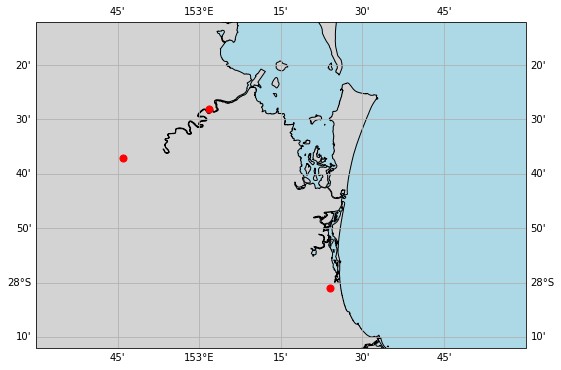

In [5]:
crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_geometries(aus_map.geometry, crs = crss, facecolor = "#d3d3d3", edgecolor = "black") 
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.LAND, facecolor = "#add8e6") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Include a 'scatterplot' of Australia's 543 largest cities and towns
ax.scatter(
    x=big_cities.lng,
    y=big_cities.lat,
    color="red",
    s=50,
    alpha=1,
    transform=crss)

ax.set_extent([152.5, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -28.2, # Latitude lower bound (degrees north)
               -27.2]) # Latitude upper bound (degrees north)

plt.show()

The three dots in our map are Ipswich, Brisbane and the Gold Coast. These are the three cities in this region with over 100,000 people. Now, let's label these points. We learned about figure annotations back in Module 3. The only difference here is that we need to give our text annotations the same coordinates as our dataset. Also note, Matplotlib's annotation functions only accepts a single annotation at a time, so we need a **for loop** to annotate all our points.

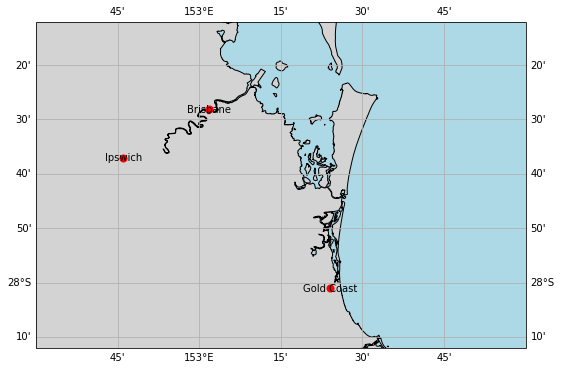

In [6]:
crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_geometries(aus_map.geometry, crs = crss, facecolor = "#d3d3d3", edgecolor = "black") 
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.LAND, facecolor = "#add8e6") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

## Include a 'scatterplot' of Australia's 543 largest cities and towns
ax.scatter(x=big_cities.lng,
    y=big_cities.lat,
    color="red",
    s=50,
    alpha=1,
    transform=crss)

for ind in big_cities.index:
    ax.annotate(big_cities.city[ind], # Text
                xy=[big_cities.lng[ind], big_cities.lat[ind]], # Lon and lat coordinates
                xycoords='data', # Tell ax.annotate to use the same CRS as the big_cities dataset
               va = "center", ha = "center") # va - vertical alignment of annotation, ha - horizontal alignment

ax.set_extent([152.5, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -28.2, # Latitude lower bound (degrees north)
               -27.2]) # Latitude upper bound (degrees north)

plt.show()

**Exercises:**
1) In Module 3, we learned about putting a bounding box around our annotations. Add a bounding box to the city names in the map above. More broadly, experiment with the figure above, changing the colours, font sizes and position of the labels. Experiment with the position of the labels too, and consider whether points are necessary in a simple figure like this, when we have labels.\
2) Add in smaller towns, using different attributes for the points and annotations. Give Brisbane a unique marker, since it is Queensland's capital city.\
3) The Queensland Government has a huge collection of spatial datasets (see [here](https://qldspatial.information.qld.gov.au/catalogue/)) available for public access. Using what you know now about plotting polygons and points, download some shapefile datasets (shp) and add more information to your figure of South East Queensland. For instance, think about adding Local Government Areas, or major watercourses.